In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [4]:
df.isnull().sum()

Cabin       687
Ticket        0
number        0
Survived      0
dtype: int64

In [5]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [15]:
counts = df['number'].value_counts().sort_index()
counts

number
1    129
2    126
3    117
4    126
5    123
6    131
A    139
Name: count, dtype: int64

In [13]:
counts.index

Index(['1', '2', '3', '4', '5', '6', 'A'], dtype='object', name='number')

In [14]:
counts.values

array([129, 126, 117, 126, 123, 131, 139])

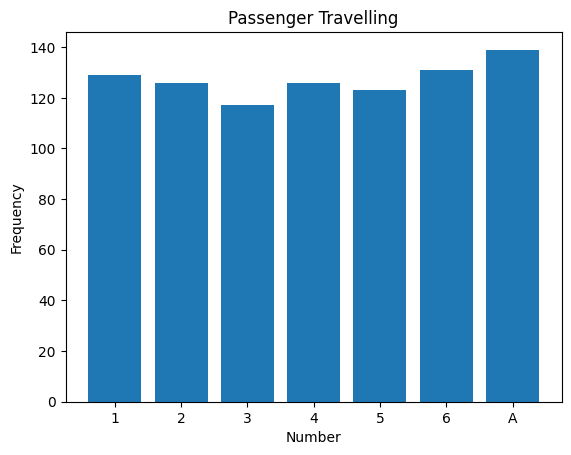

In [17]:
plt.bar(counts.index, counts.values)
plt.title('Passenger Travelling')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

##### Another way to draw bar plot

Text(0.5, 1.0, 'Passengers travelling')

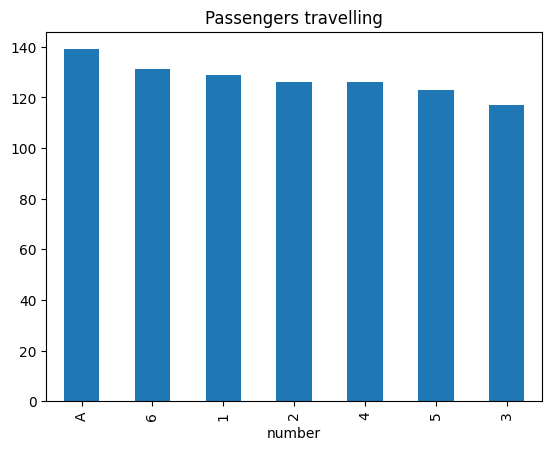

In [24]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passengers travelling')

In [25]:
#Extract numerical part
df['number_numerical'] = pd.to_numeric(df['number'], errors='coerce', downcast='integer')

In [ ]:
#Extract categorical part
#df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)

#df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [ ]:
#Extract categorical part
df['number_categorical'] = df['number'].where(df['number_numerical'].isnull())
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [31]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [36]:
#Capture, numerical part with regular expression
df['Cabin_num'] = df['Cabin'].str.extract("(\d+)")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hrsh.raj\AppData\Local\Temp\ipykernel_34616\1242759182.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Cabin_num'] = df['Cabin'].str.extract("(\d+)")


In [39]:
df['Cabin'].str.extract('([A-Za-z]+)')

,0
0,NaN
1,C
2,NaN
3,C
4,NaN
...,...
886,NaN
887,B
888,NaN
889,C


In [44]:
#Captures the first letter
df['cabin_cat'] = df['Cabin'].str[0]

In [47]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [48]:
df['number_numerical'] = df['number_numerical'].fillna(0)

In [49]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,0.0,A,NaN,NaN


In [52]:
df['number_categorical'] = df['number_categorical'].fillna('missing')
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,missing,NaN,NaN
1,C85,PC 17599,3,1,3.0,missing,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,missing,NaN,NaN
3,C123,113803,3,1,3.0,missing,123,C
4,NaN,373450,A,0,0.0,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

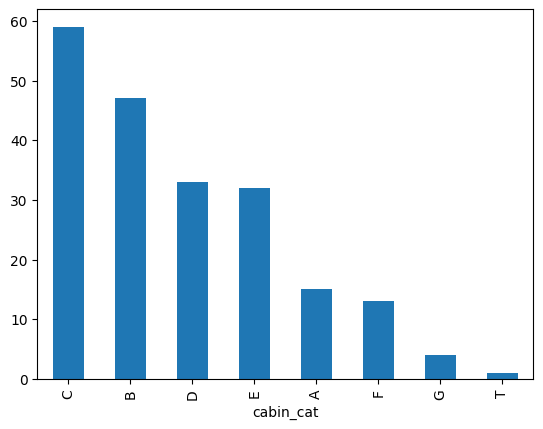

In [58]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [61]:
df.head(2)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,missing,NaN,NaN
1,C85,PC 17599,3,1,3.0,missing,85,C


In [63]:
#Extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda x: x.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'], errors='coerce', downcast='integer')
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat,ticket_num
0,NaN,A/5 21171,5,0,5.0,missing,NaN,NaN,21171.0
1,C85,PC 17599,3,1,3.0,missing,85,C,17599.0
2,NaN,STON/O2. 3101282,6,1,6.0,missing,NaN,NaN,3101282.0
3,C123,113803,3,1,3.0,missing,123,C,113803.0
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0


In [64]:
df['Ticket'].apply(lambda x: x.split()[0])

0           A/5
1            PC
2      STON/O2.
3        113803
4        373450
         ...   
886      211536
887      112053
888       W./C.
889      111369
890      370376
Name: Ticket, Length: 891, dtype: object

In [68]:
#Extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda x: x.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan, df['ticket_cat'])
df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,missing,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,missing,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,missing,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,missing,123,C,113803.0,NaN
4,NaN,373450,A,0,0.0,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,missing,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,missing,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,missing,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,missing,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,0.0,A,NaN,NaN,237736.0,NaN
